# 04. 베이지안 분석에서의 균형과 순서

Alison Bechdel의 1985년 연재 만화 The Rule에서 한 등장인물은 다음 세 가지 규칙을 만족하는 경우에만 영화를 본다고 한다.(Bechdel 1986).

> 영화에는 최소한 두 명의 여성이 등장
>
> 이 두 여자는 서로 이야기를 나눔
>
> 그리고 그들은 남자 이외의 것에 대해 이야기

<br>

#### 지금까지 본 영화 중 최근 영화 중 몇 퍼센트가 기준을 통과했을까?

<br>

#### $\pi$가 0 ~ 1 사이의 값을 가지며, 각각의 사람이 생각하는 기준을 통과하는 영화의 비율은 서로 다름 $\rightarrow$ 서로 다른 사전분포

In [2]:
library(bayesrules)
library(tidyverse)
library(janitor)

<br>

## 04.01. 서로 다른 사전/사후분포
- **사람마다 사전 변동성의 수준이 다른 것은, 사전 정보에 대한 확신 정도가 다르다는 사실을 반영**
    
    **$\rightarrow$ 사전 정보가 더 확실할수록, 사전 변동성은 더 작아지며, 사전 정보가 더 모호할수록, 사전 변동성은 더 커짐**
    
    

<br>

#### 안정적인 사전분포 
> 유익한 사전분포는 높은 확실성, 즉 낮은 변동성을 가지고 알려지지 않은 변수에 대한 특정 정보를 반영

<br>

#### 모호한 사전정보
> 모호하거나 분산이 큰 사전분포는 알려지지 않은 변수에 대한 구체적인 정보를 거의 반영하지 않으며, 
> 

<br>

#### $n=20$의 영화

data(bechdel, package = "bayesrules")

In [5]:
set.seed(84735)
bechdel_20 <- bechdel %>% sample_n(20)

In [6]:
bechdel_20 %>% head(3)

year,title,binary
<dbl>,<chr>,<chr>
2005,King Kong,FAIL
1983,Flashdance,PASS
2013,The Purge,FAIL


* 20개 영화 중 9개(45%)만이 테스트를 통과

In [7]:
bechdel_20 %>% 
  tabyl(binary) %>% 
  adorn_totals("row")

,binary,n,percent
,<chr>,<int>,<dbl>
1,FAIL,11,0.55
2,PASS,9,0.45
3,Total,20,1.00


<br>

#### 3명의 사람들의 서로 다른 사전분포에 따른 사후분포

| 분석가 | $사전분포$ | $사후분포$ |
| - | - | - |
| 1 | $Y=6\;\;of\;\;n=13$ | $Beta(20,8)$ |
| 2 | $Y=29\;\;of\;\;n=63$ | $Beta(43,35)$ |
| 3 | $Y=46\;\;of\;\;n=99$ | $Beta(60,54)$ |

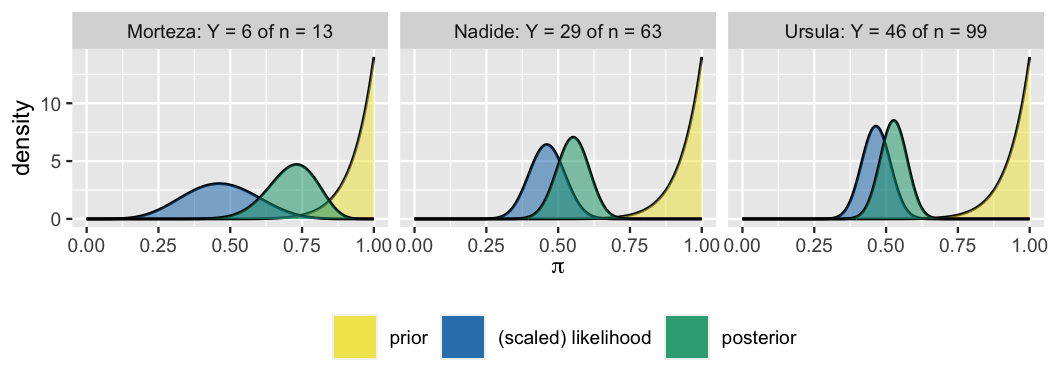

<br>

## 04.02. 사전분포와 데이터의 균형유지

<br>

#### $\pi = \frac{y}{n}$에 대한 사전분포가 $Beta(\alpha,\beta)$일 때, 켤레사전분포 정리에 따라 사후분포는 $\text{Beta}(\alpha + y, \beta + n - y)$이며 사후평균은

$$E(\pi | Y=y)  = \frac{\alpha + y}{\alpha + \beta + n}  .$$

#### 이는 '사전평균과, 관측값 성공비율의 가중평균형태'로 표현가능

$$\begin{split}
E(\pi | Y=y)  
& = \frac{\alpha}{\alpha + \beta + n} + \frac{y}{\alpha + \beta + n}  \\
& = \frac{\alpha}{\alpha + \beta + n}\cdot\frac{\alpha + \beta}{\alpha + \beta} + \frac{y}{\alpha + \beta + n}\cdot\frac{n}{n}  \\
& = \frac{\alpha + \beta}{\alpha + \beta + n}\cdot\frac{\alpha}{\alpha + \beta} + \frac{n}{\alpha + \beta + n}\cdot\frac{y}{n}  \\
& = \frac{\alpha + \beta}{\alpha + \beta + n}\cdot E(\pi) + \frac{n}{\alpha + \beta + n}\cdot\frac{y}{n}  .  \\
\end{split}$$

$$(\frac{\alpha + \beta}{\alpha + \beta + n} + \frac{n}{\alpha + \beta + n} = 1  )$$

<br>

#### 또한 관측값의 개수 $n$이 커질수록, 사전평균의 가중치 (사전분포의 영향력)이 약해지며, 관측값 성공비율 (관측값의 영향력)이 높아짐

$$\frac{\alpha + \beta}{\alpha + \beta + n} \to 0 \;\; \text{ as } n \to \infty,$$

$$\frac{n}{\alpha + \beta + n} \to 1 \;\; \text{ as } n \to \infty.$$

<br>

#### 따라서, 관측값이 많을수록 사후평균은 사전평균이 아닌 관측값의 추세를 더 강하게 반영

$$E(\pi | Y=y) = \frac{\alpha + \beta}{\alpha + \beta + n}\cdot E(\pi) + \frac{n}{\alpha + \beta + n}\cdot\frac{y}{n} \;\;\; \to \;\;\; \frac{y}{n}  .$$

<br>

#### 사후평균이 관측값의 추세를 반영하는 속도는, 사전분포가 안정적인지 모호한지의 여부에 따라 조절될 수 있음
$$\text{Mode}(\pi | Y=y) = \frac{\alpha + \beta - 2}{\alpha + \beta + n - 2} \cdot\text{Mode}(\pi) + \frac{n}{\alpha + \beta + n - 2} \cdot\frac{y}{n}  .$$

<br>

## 04.03. 순차적 분석
- **"점점 더 많은 관측값이 들어온다"는 말은 데이터 수집, 따라서 우리의 사후분포에 대한의 진화가 점진적으로 일어나는 것을 의미**

<br>

#### 순차적 베이지안 분석(베이지안 학습)

> 순차적 베이지안 분석에서는, 더 많은 데이터가 들어올수록 사후 모델이 점진적으로 갱신
>
> 각각의 새로운 데이터가 있을 때마다 이 데이터를 관찰하기 전의 우리의 이해를 반영한 직전의 사후모델이, 새로운 사전모델이 됨
>

<br>

#### 어떠한 순서로 데이터가 관측됨에 따라서, 베이지안 학습 시퀀스 중에서 사전/사후분포의 형태가 달라짐

- **순서1**

<table class="table" style="width: auto !important; margin-left: auto; margin-right: auto;">
<caption>
</caption>
<thead>
<tr>
<th style="text-align:left;">
Day
</th>
<th style="text-align:left;">
Data
</th>
<th style="text-align:left;">
Model
</th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align:left;">
0
</td>
<td style="text-align:left;">
NA
</td>
<td style="text-align:left;">
Beta(1,10)
</td>
</tr>
<tr>
<td style="text-align:left;">
1
</td>
<td style="text-align:left;">
Y = 1 of n = 10
</td>
<td style="text-align:left;">
Beta(2,19)
</td>
</tr>
<tr>
<td style="text-align:left;">
2
</td>
<td style="text-align:left;">
Y = 17 of n = 20
</td>
<td style="text-align:left;">
Beta(19,22)
</td>
</tr>
<tr>
<td style="text-align:left;">
3
</td>
<td style="text-align:left;">
Y = 8 of n = 10
</td>
<td style="text-align:left;">
Beta(27,24)
</td>
</tr>
</tbody>
</table>

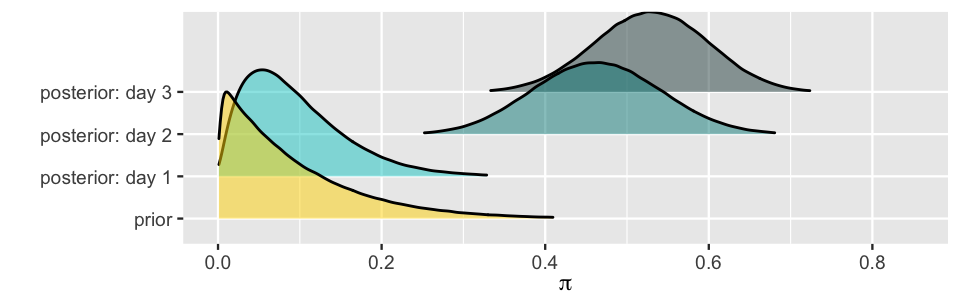

<br>

- **순서2**

<table class="table" style="width: auto !important; margin-left: auto; margin-right: auto;">
<caption>
</caption>
<thead>
<tr>
<th style="text-align:left;">
Day
</th>
<th style="text-align:left;">
Data
</th>
<th style="text-align:left;">
Model
</th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align:left;">
0
</td>
<td style="text-align:left;">
NA
</td>
<td style="text-align:left;">
Beta(1,10)
</td>
</tr>
<tr>
<td style="text-align:left;">
1
</td>
<td style="text-align:left;">
Y = 8 of n = 10
</td>
<td style="text-align:left;">
Beta(9,12)
</td>
</tr>
<tr>
<td style="text-align:left;">
2
</td>
<td style="text-align:left;">
Y = 17 of n = 20
</td>
<td style="text-align:left;">
Beta(26,15)
</td>
</tr>
<tr>
<td style="text-align:left;">
3
</td>
<td style="text-align:left;">
Y = 1 of n = 10
</td>
<td style="text-align:left;">
Beta(27,24)
</td>
</tr>
</tbody>
</table>

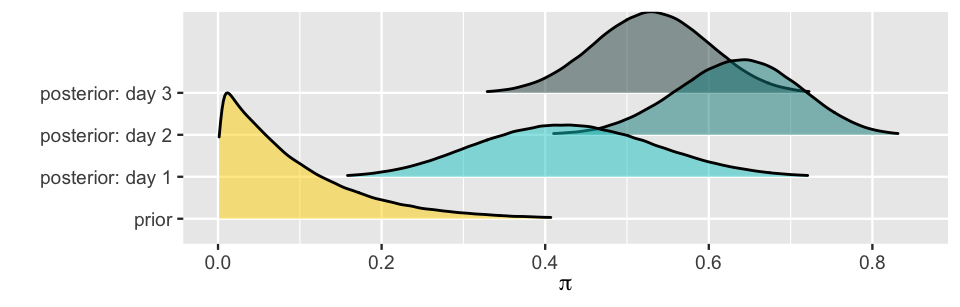

<br>

## 04.04. 관측순서 불변성
>
> $\theta$가 사전분포함수 $f(\theta)$의 매개변수일 때, 순차적 분석에서의 첫 관측값 $y_1$과 두 번째 관측값 $y_2$의 순서를 바꾸어도,
>
> 최종적으로는 같은 사후분포를 도출
> $$f(\theta | y_1,y_2) = f(\theta|y_2,y_1).$$
>
> **사후분포, 관측값의 순서에 따라 변하지 않음**

<br>

### $f(\theta | y_1,y_2)$가 $y_1$, $y_2$에 따른 사후분포일 때, 
1. **첫 관측에서**

$$f(\theta|y_1) = \frac{\text{prior}\cdot \text{likelihood}}{\text{normalizing constant}} = \frac{f(\theta)L(\theta|y_1)}{f(y_1)} .$$ 

2. **두 번째 관측에서**

$$f(\theta|y_2) = \frac{\frac{f(\theta)L(\theta|y_1)}{f(y_1)}L(\theta|y_2)}{f(y_2)} =  \frac{f(\theta)L(\theta|y_1)L(\theta|y_2)}{f(y_1)f(y_2)} .$$

<br>

#### 만약 순서를 바꾼다고 한다면,

$$f(\theta|y_2,y_1) =  \frac{f(\theta)L(\theta|y_2)L(\theta|y_1)}{f(y_2)f(y_1)} .$$

#### $\rightarrow$ 사후분포는 관측값 $y_1$, $y_2$의 순서에 의하여 영향받지 않으며
#### 한번에 여러 관측을 동시에 하는지의 여부와, 순서대로 관측하는지의 여부에 따라서도 영향을 받지 않음
#### $\rightarrow$ 이는 순차적 베이지안 분석이, 관측값들 사이의 독립성을 가정함을 의미

$$f(y_1,y_2) = f(y_1)f(y_2) \;\; \text{ and } \;\; f(y_1,y_2 | \theta) = f(y_1|\theta)f(y_2|\theta)  .$$ 

$$\begin{split}
f(\theta|y_1,y_2) 
& = \frac{f(\theta)L(\theta|y_1,y_2)}{f(y_1,y_2)} \\
& = \frac{f(\theta)f(y_1,y_2|\theta)}{f(y_1)f(y_2)} \\
& = \frac{f(\theta)L(\theta|y_1)L(\theta|y_2)}{f(y_1)f(y_2)}  . \\
\end{split}$$

<br>

## 04.05. 베이지안 분석의 참고사항
#### 사전분포를 설정할 때, 사전분포의 확률밀도/질량함수 값이 0이되는 범위를 최소화
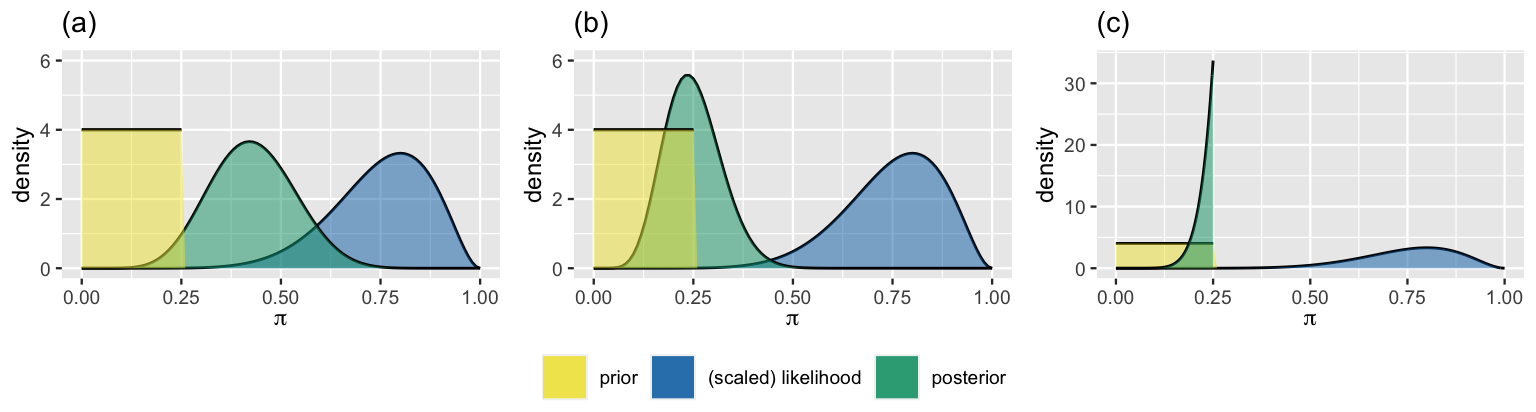

<br>

#### 주관성
- 최상의 시나리오에서 주관적인 사전분포는 분석에 포함되어야 하는 풍부한 과거 경험을 반영할 수 있음. 

    주관적인 사전분포가 실제 관측값과 대치되더라도, 그 관측값이 축적됨에 따라 사후분포에 대한 영향력은 사라짐
    
- 빈도주의 분석방법이라고 할지라도, 어떤 사람도 분석에서 모든 주관을 제거할 수 없으며. 

    주관적 경험과 지식은 우리가 질문하는 연구 질문부터 수집하는 데이터에 이르기까지 모든 것에 영향을 줌